# Geopandas

## http://geopandas.org/index.html

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [1]:
import os,sys
import glob
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[30,10]

In [2]:
import geopandas as gpd

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [4]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


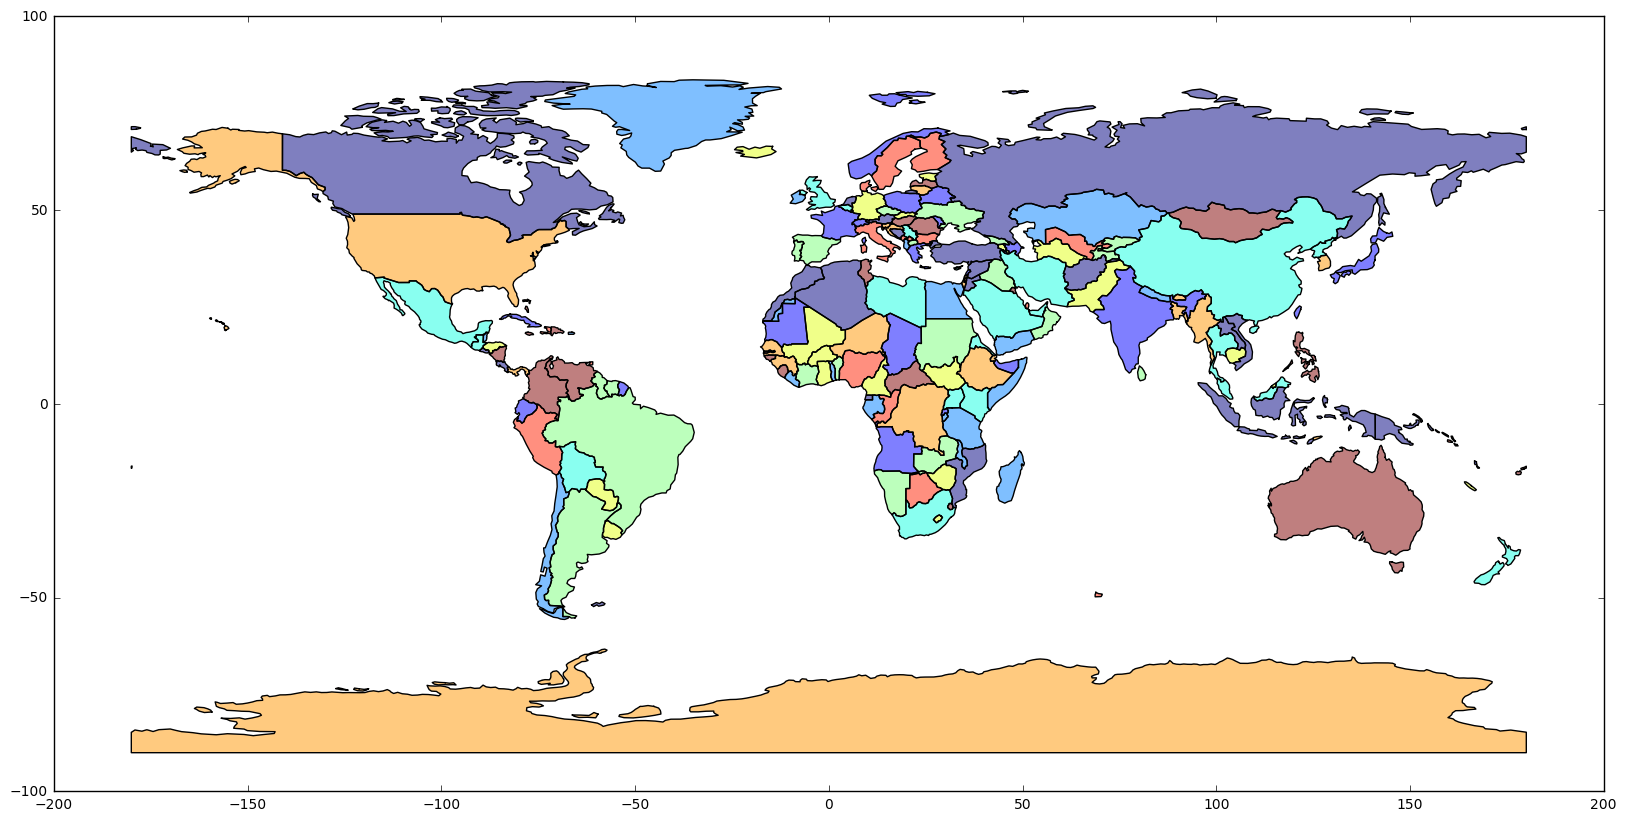

In [5]:
world.plot()

In [6]:
world.geometry.name

'geometry'

In [7]:
# how to rename the column
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [8]:
world.geometry.name

'borders'

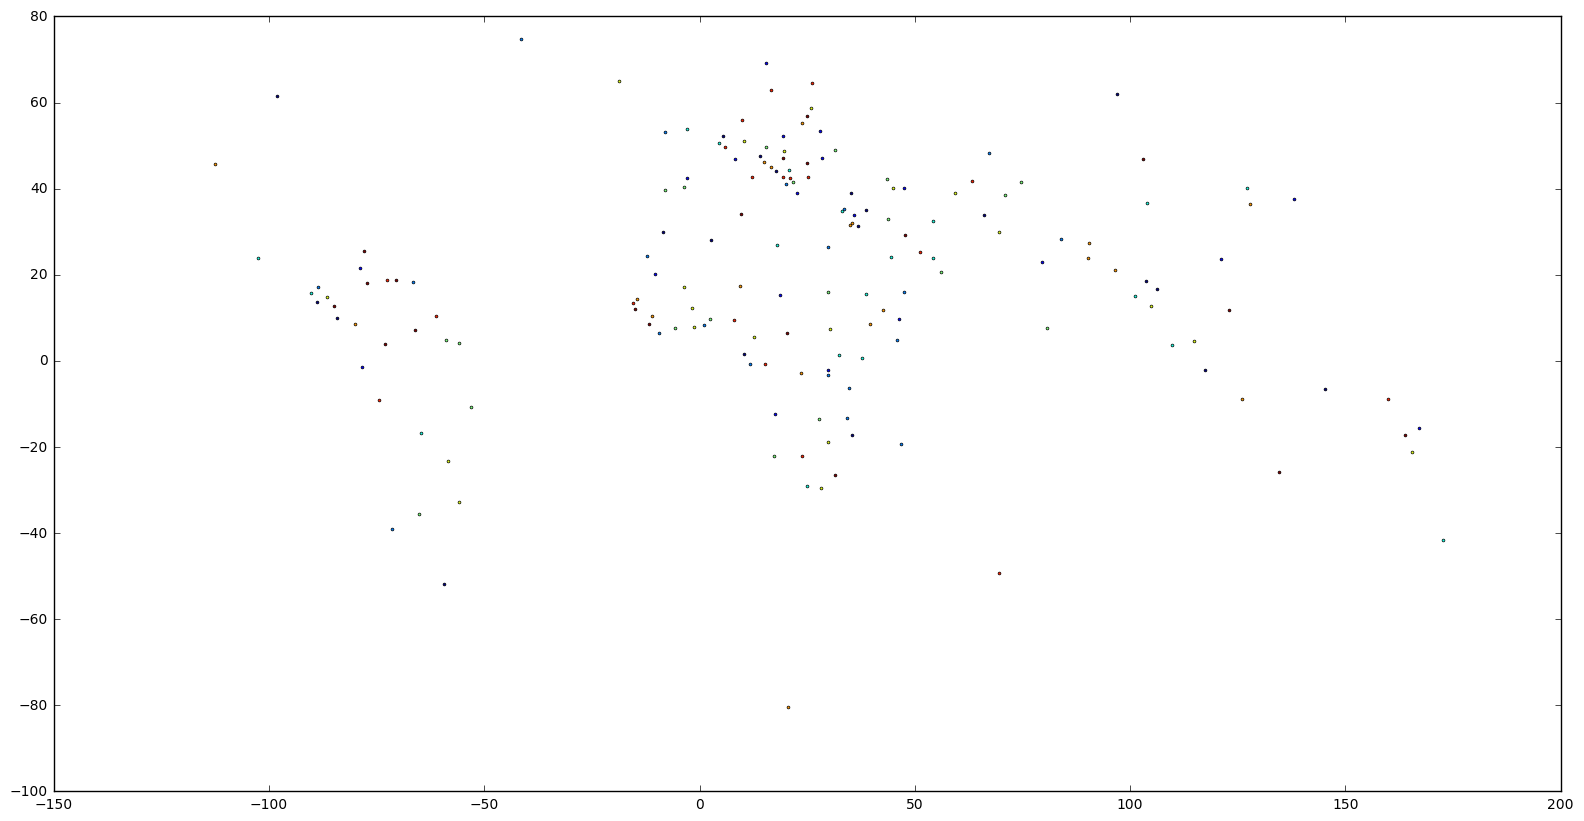

In [9]:
# Now, we create centroids and make it the geometry:

world['centroid_column'] = world.centroid

world = world.set_geometry('centroid_column')

world.plot();

# Reading and Wrting files

In [10]:
# geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using 
# gpd.read_file()

import fiona; help(fiona.open)

Help on function open in module fiona:

open(path, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None)
    Open file at ``path`` in ``mode`` "r" (read), "a" (append), or
    "w" (write) and return a ``Collection`` object.
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings lik

In [11]:
# Writing Spatial Data

# GeoDataFrames can be exported to many different standard formats using the GeoDataFrame.to_file() method. 
# For a full list of supported formats, type 

import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [12]:
shpfile=r'E:\MT_shape_files\PT_0.8547s_WGS84.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

shpf.columns


Index([u'Name', u'geometry', u'n_skew', u'phi_max', u'phi_min', u'skew'], dtype='object')

In [13]:
shpf.geometry

0     POLYGON ((725343.1652460001 7524023.642477, 72...
1     POLYGON ((725979.570086 7524054.479939, 725965...
2     POLYGON ((726649.135757 7524131.780442, 726636...
3     POLYGON ((726909.129039 7524013.915241, 726891...
4     POLYGON ((727416.8701910001 7523985.375471, 72...
5     POLYGON ((727875.747375 7524668.647638, 727890...
6     POLYGON ((724055.112245 7528981.156321, 724037...
7     POLYGON ((724503.714161 7529021.273345, 724486...
8     POLYGON ((725069.071569 7529021.439701, 725050...
9     POLYGON ((725538.693321 7529895.870984, 725559...
10    POLYGON ((726048.5678580001 7528957.000612, 72...
11    POLYGON ((726524.200997 7529829.671165, 726540...
Name: geometry, dtype: object

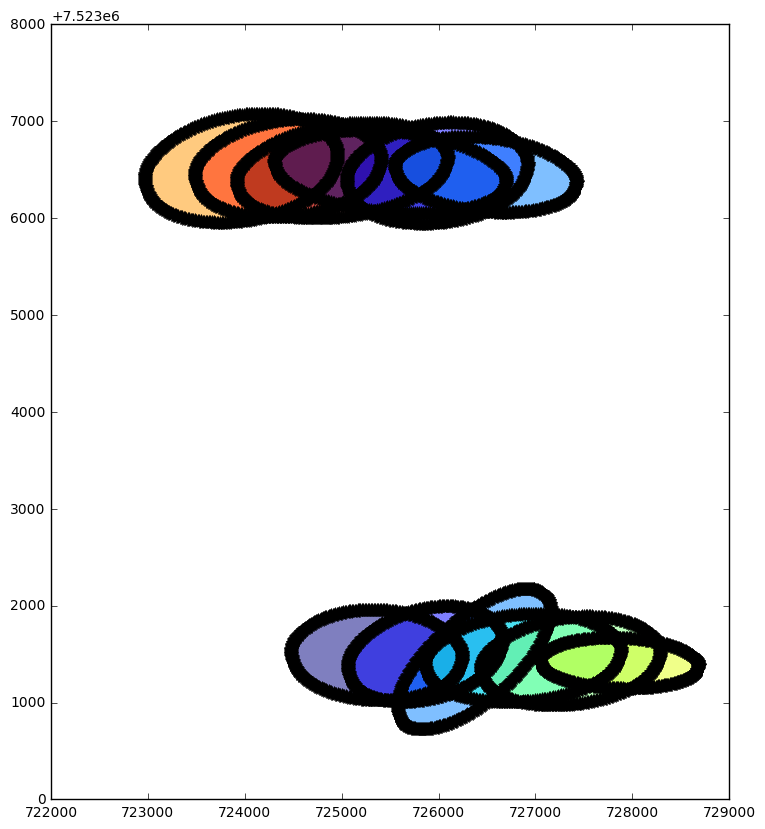

In [14]:
shpf.plot(marker='*', markersize=10)


# Re-Projecting

In [15]:
shpf.geometry.crs

{'init': u'epsg:32755'}

In [16]:
myshpf= shpf.to_crs({'init': 'epsg:4326'})

In [17]:
myshpf.geometry.crs

{'init': 'epsg:4326'}

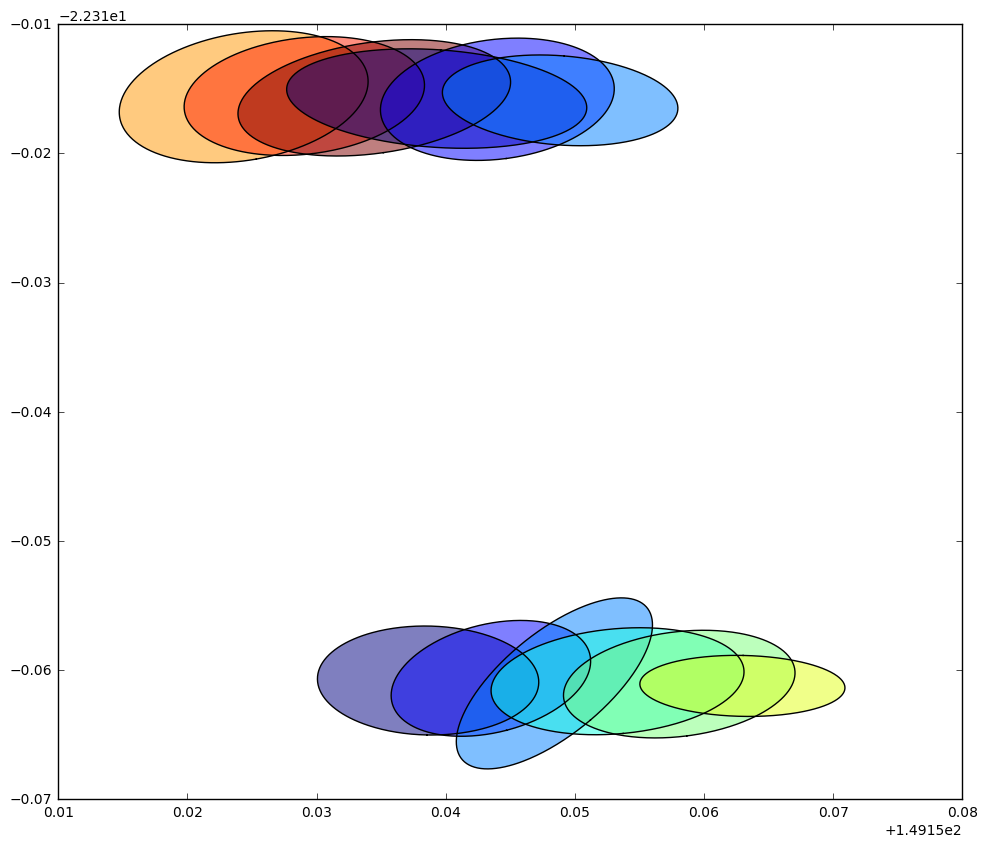

In [18]:
myshpf.plot()

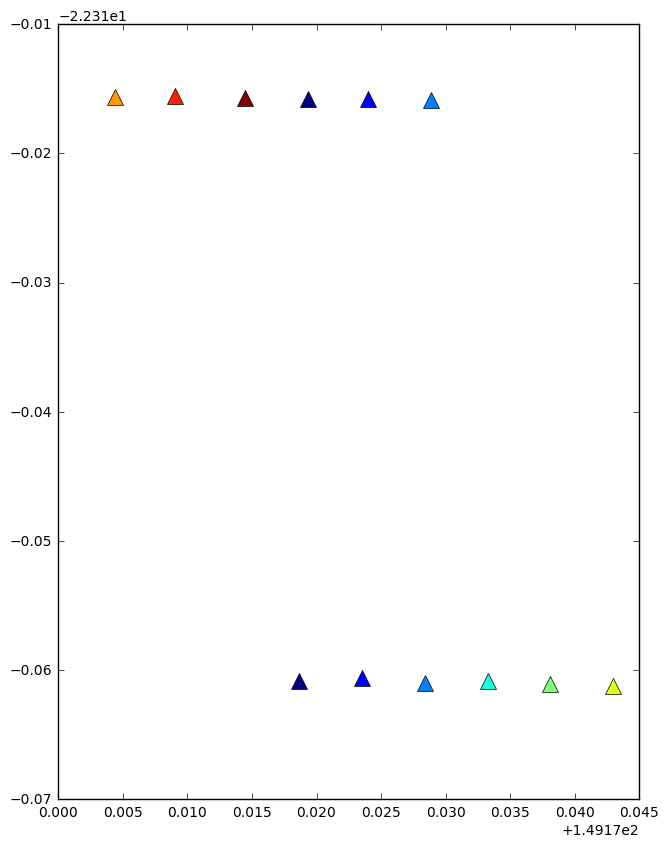

In [19]:
# Now, we create centroids and make it the geometry:

myshpf['centroid_column'] =myshpf.centroid

myshpf = myshpf.set_geometry('centroid_column')

myshpf.plot(marker='^', markersize='12');

In [20]:
myshpf.head()

,Name,geometry,n_skew,phi_max,phi_min,skew,centroid_column
0,15125A,"POLYGON ((149.188538174657 -22.37502136551407,...",-5.279924,28.625382,15.145686,-2.639962,POINT (149.1886388679267 -22.37080552938412)
1,15126A,POLYGON ((149.1947111157651 -22.37465928443497...,7.062422,26.459928,14.996171,3.531211,POINT (149.193499943748 -22.3706388822966)
2,15127A,POLYGON ((149.2011992787809 -22.37387314747262...,9.780302,31.909064,13.814777,4.890151,POINT (149.1984165278017 -22.37102782447512)
3,15128A,POLYGON ((149.2037396414113 -22.37490280825523...,-8.111691,32.837152,14.588956,-4.055846,POINT (149.2033054970916 -22.37086107001056)
4,15129A,POLYGON ((149.2086720810148 -22.37509322974174...,-2.104567,30.154278,14.536195,-1.052284,POINT (149.2080832780716 -22.37108330489606)


In [21]:
myshpf['geometry']

0     POLYGON ((149.188538174657 -22.37502136551407,...
1     POLYGON ((149.1947111157651 -22.37465928443497...
2     POLYGON ((149.2011992787809 -22.37387314747262...
3     POLYGON ((149.2037396414113 -22.37490280825523...
4     POLYGON ((149.2086720810148 -22.37509322974174...
5     POLYGON ((149.2130285993706 -22.36886419009411...
6     POLYGON ((149.1753403441741 -22.33043543018717...
7     POLYGON ((149.179687756769 -22.33001476112013,...
8     POLYGON ((149.1851736862166 -22.32993935965193...
9     POLYGON ((149.189607409516 -22.32198383652046,...
10    POLYGON ((149.1946872908707 -22.33039261425182...
11    POLYGON ((149.1991790387915 -22.32245197688685...
Name: geometry, dtype: object

In [22]:
shpf.head()

,Name,geometry,n_skew,phi_max,phi_min,skew
0,15125A,"POLYGON ((725343.1652460001 7524023.642477, 72...",-5.279924,28.625382,15.145686,-2.639962
1,15126A,"POLYGON ((725979.570086 7524054.479939, 725965...",7.062422,26.459928,14.996171,3.531211
2,15127A,"POLYGON ((726649.135757 7524131.780442, 726636...",9.780302,31.909064,13.814777,4.890151
3,15128A,"POLYGON ((726909.129039 7524013.915241, 726891...",-8.111691,32.837152,14.588956,-4.055846
4,15129A,"POLYGON ((727416.8701910001 7523985.375471, 72...",-2.104567,30.154278,14.536195,-1.052284


In [23]:
shpf.tail()

,Name,geometry,n_skew,phi_max,phi_min,skew
7,16123A,"POLYGON ((724503.714161 7529021.273345, 724486...",6.015245,31.290934,16.154709,3.007623
8,16124A,"POLYGON ((725069.071569 7529021.439701, 725050...",0.345486,35.597113,15.425505,0.172743
9,16125A,"POLYGON ((725538.693321 7529895.870984, 725559...",-1.360815,38.913204,13.564439,-0.680407
10,16126A,"POLYGON ((726048.5678580001 7528957.000612, 72...",-5.489443,30.453740,16.634638,-2.744721
11,16127A,"POLYGON ((726524.200997 7529829.671165, 726540...",0.767038,30.559436,12.390016,0.383519


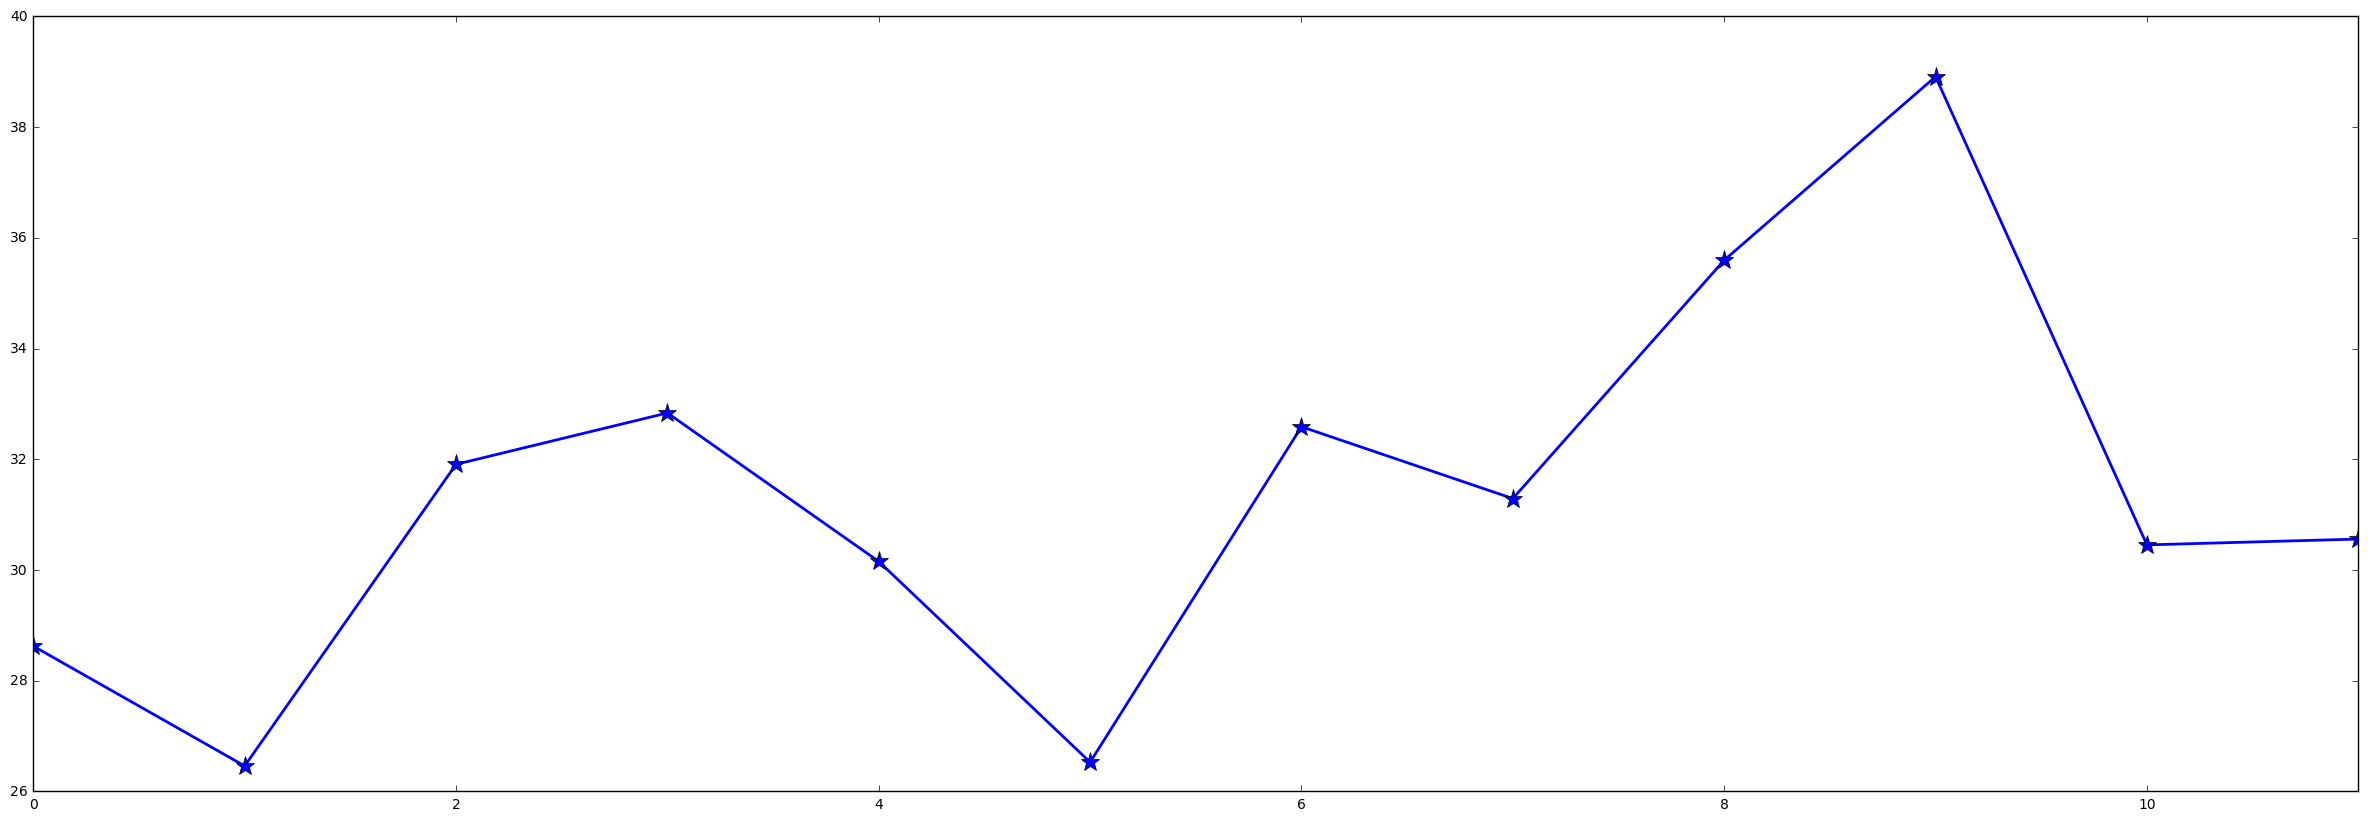

In [24]:
shpf['phi_max'].plot(marker='*', markersize=14)

In [25]:

shpfile=r'E:\MT_shape_files\Tip_1.4286s_WGS84_imag.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)


shpf.columns

Index([u'Name', u'ang_imag', u'geometry', u'mag_imag'], dtype='object')

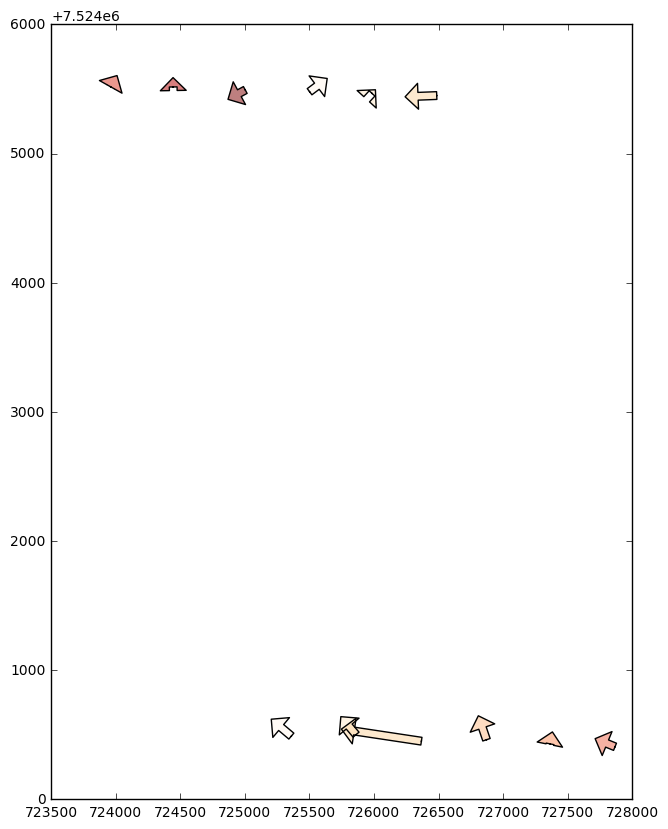

In [26]:
shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)

In [27]:
shpf.head()

,Name,ang_imag,geometry,mag_imag
0,15125A,-49.934943,"POLYGON ((725360.330833 7524490.387516, 725341...",0.203194
1,15126A,-40.219458,"POLYGON ((725861.314778 7524501.554359, 725838...",0.182553
2,15127A,-81.435398,"POLYGON ((726367.124612 7524451.094078, 726362...",0.626247
3,15128A,-18.798784,"POLYGON ((726870.97255 7524462.186449, 726842....",0.195909
4,15129A,11.481242,"POLYGON ((727362.745811 7524430.361093, 727333...",0.094205


In [28]:
type(shpf.geometry)

geopandas.geoseries.GeoSeries

In [29]:
shpf.geometry.crs

{'init': u'epsg:32755'}

In [30]:

shpfile=r'E:\MT_shape_files\Tip_1.4286s_WGS84_real.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

In [31]:
shpf.head()

,Name,ang_real,geometry,mag_real
0,15125A,170.012042,"POLYGON ((725360.330833 7524490.387516, 725389...",0.111912
1,15126A,-150.926019,"POLYGON ((725861.314778 7524501.554359, 725887...",0.026377
2,15127A,-70.166684,"POLYGON ((726367.124612 7524451.094078, 726356...",0.423844
3,15128A,-61.117819,"POLYGON ((726870.97255 7524462.186449, 726856....",0.327411
4,15129A,-170.143225,"POLYGON ((727362.745811 7524430.361093, 727392...",0.101169


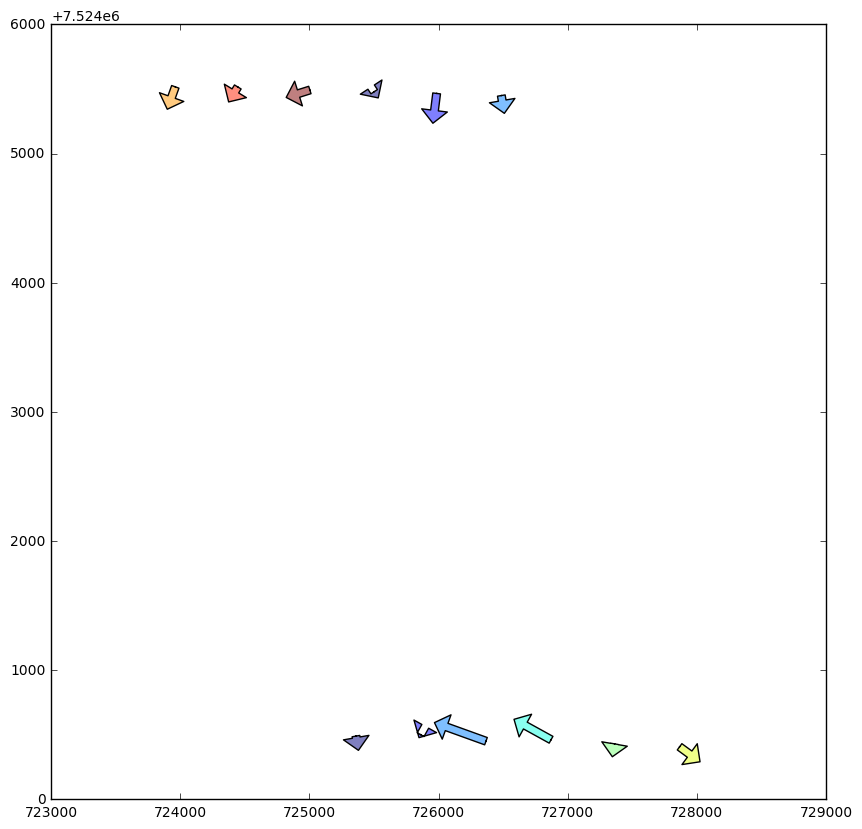

In [32]:
shpf.plot()

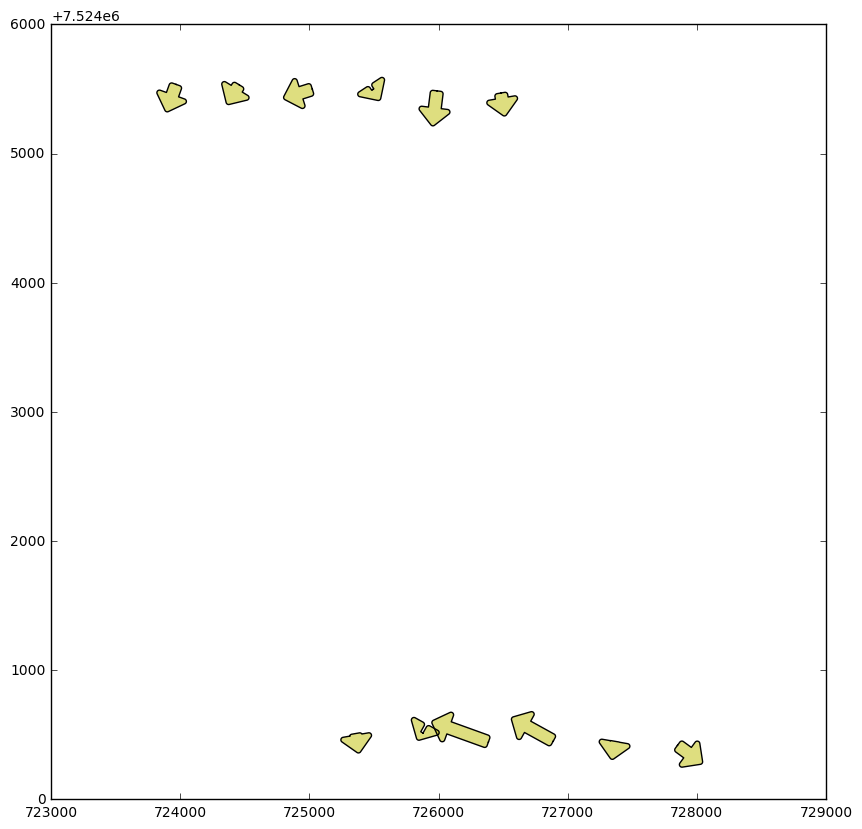

In [33]:
shpf2=shpf.buffer(20)
shpf2.plot(color='y')

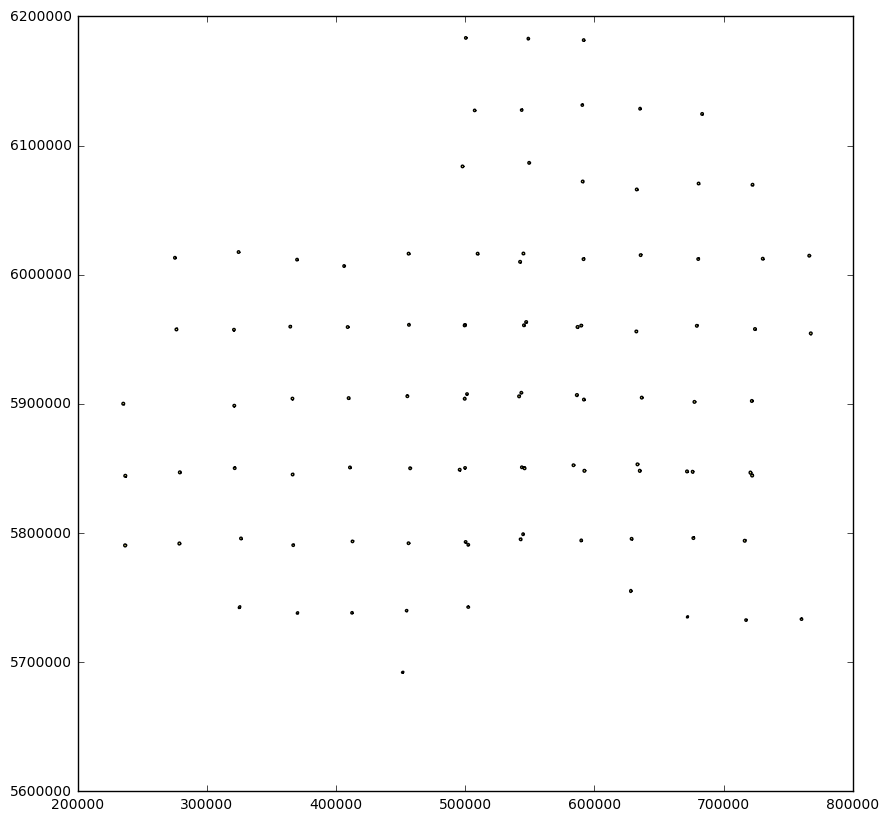

In [45]:
# modem more features in the shape files
shpfile=r'E:\MT_modem_shape_files\PT_10s_NAD27.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

# shpf2=shpf.buffer(16)
shpf.plot(color='y')

In [35]:
shpf.head()

,Name,geometry,n_skew,phi_max,phi_min,skew
0,VIC097,"POLYGON ((684165.304623 6123945.999179, 684153...",-0.232004,37.952401,34.521755,-0.116002
1,VIC096,"POLYGON ((636228.109789 6128350.661506, 636223...",-0.570453,37.239828,32.335808,-0.285226
2,VIC095,"POLYGON ((590977.653236 6132205.468046, 590992...",-0.283073,33.725709,32.714897,-0.141536
3,VIC094,"POLYGON ((544324.580367 6128132.993122, 544336...",-0.315355,34.240216,32.157094,-0.157678
4,VIC093,"POLYGON ((508165.859628 6127005.265231, 508161...",-0.339649,34.214512,32.802138,-0.169825


In [36]:
shpf.shape

(98, 6)

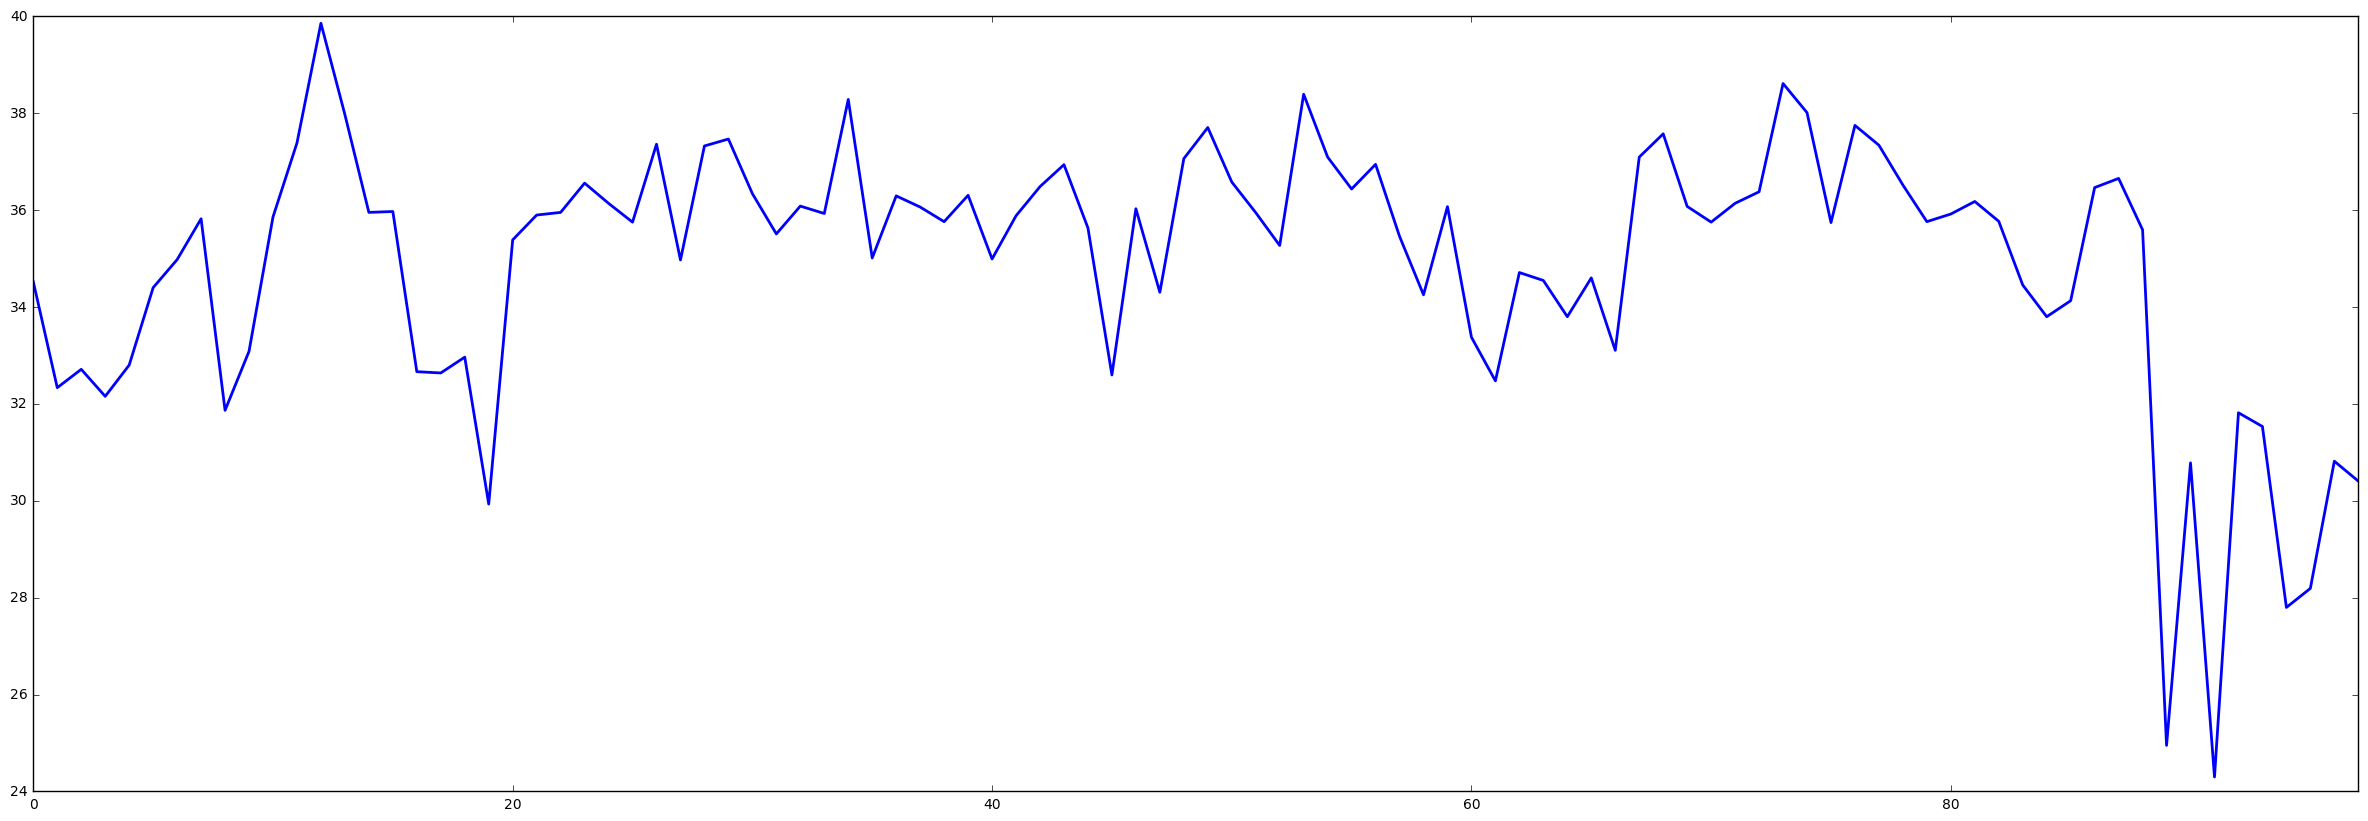

In [37]:
shpf['phi_min'].plot()

In [38]:

shpfile=r'E:\MT_modem_shape_files\Tip_10s_NAD27_real.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

shpf.head()

,Name,ang_real,geometry,mag_real
0,VIC097,0.0,"POLYGON ((683417.415539 6124532.142202, 683387...",0.0
1,VIC096,0.0,"POLYGON ((635370.7681230001 6128589.705812, 63...",0.0
2,VIC095,0.0,"POLYGON ((590662.835407 6131361.815436, 590632...",0.0
3,VIC094,0.0,"POLYGON ((543712.855982 6127493.276003, 543682...",0.0
4,VIC093,0.0,"POLYGON ((507300.390805 6127262.469669, 507270...",0.0


In [39]:
shpf.shape

(98, 4)

# Mapping with Folium

In [46]:
# conda install folium

import folium

mapa = folium.Map([-30.0, 149.0], zoom_start=4,   tiles='cartodbpositron')


In [47]:
myshpf = myshpf.set_geometry('geometry')
myshp2json=myshpf.geometry.to_json()

points =folium.features.GeoJson(myshp2json)
mapa.add_children(points)

In [48]:
geoj2=shpf.to_crs(epsg=4326).to_json()

points2 =folium.features.GeoJson(geoj2)
mapa.add_children(points2)